<div class="markdown-google-sans">
  <h1>INTRODUÇÃO À CIÊNCIA DE DADOS E APRENDIZADO DE MÁQUINAS</h1>
</div>
*Material desenvolvido para a disciplina LOB1266 - Introdução à Ciência de Dados e Aprendizado de Máquinas da Escola de Engenharia de Lorena, Universidade de São Paulo.*

Prof. Dr. Fabiano Fernandes Bargos

Bolsistas: João Vitor Fernandes Gomes (Graduando em Engenharia Química)  
Projeto: `APRIMORAMENTO DE CONTEÚDOS DIDÁTICOS DA DISCIPLINA LOB1266 - INTRODUÇÃO À CIÊNCIA DE DADOS E APRENDIZADO DE MÁQUINAS	`

# Pandas
Pandas é uma da principais bibliotecas para a manipulação, análise e exploração de dados. Ela permite trabalhar com dados tabulares (como planilhas) através de diversas ferramentas e operações:

## Inicialização

In [1]:
import pandas as pd

## Dataframe
Os dados importados pelo Pandas são organizados em `DataFrame`, uma classe bidimensional, organizada em linhas e colunas, assim como uma tabela.

In [2]:
pd.DataFrame

pandas.core.frame.DataFrame

### Exemplo 0 - DataFrames a partir de listas
Assim como uma `np.array`, uma lista de listas pode ser usada para fazer uma `DataFrame`:

In [3]:
dados = [
    [20, 30, 40], # Dados da primeira linha
    [50, 60, 70], # Dados da segunda linha
    [80, 90, 100] # Dados da terceira linha
]

colunas = ['Coluna 1', 'Coluna 2', 'Coluna 3'] # Nomes das colunas

df = pd.DataFrame(dados, columns=colunas)
df

,Coluna 1,Coluna 2,Coluna 3
0,20,30,40
1,50,60,70
2,80,90,100


### Exemplo 1 - DataFrames a partir de arquivos
Vamos explorar a seguinte tabela, que foi salva em um arquivo de nome:

> Table1.csv

Disponível pelo link:


```
url = 'https://raw.githubusercontent.com/JCFDGG/LOB1266-PUB/refs/heads/main/ExemplosAula/1/Table1.csv'
```




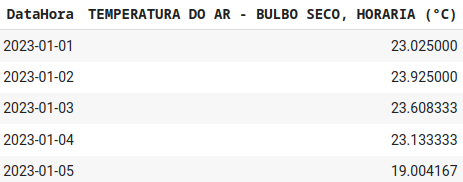

O pandas pode importar diferentes tipos de arquivos. Todos seguem a mesma lógica de importação:

#### Importação de arquivos .csv:
Para ler um arquivo `.csv`, é necessário:

In [4]:
# Ou especificar o url do arquivo
url_csv = 'https://raw.githubusercontent.com/JCFDGG/LOB1266-PUB/refs/heads/main/ExemplosAula/1/Table1.csv'
url_csv

'https://raw.githubusercontent.com/JCFDGG/LOB1266-PUB/refs/heads/main/ExemplosAula/1/Table1.csv'

In [5]:
# Ou specificar o caminho local do arquivo:
caminho_csv = 'Table1.csv'
caminho_csv

'Table1.csv'

E então, é utilizado do método `pd.read()` para ler o arquivo:

In [88]:
# Pelo método .read_csv(), importar os dados:
df_csv = pd.read_csv(caminho_csv)

# Utilizar .head(n) para ver as n primeiras linhas
df_csv.head(5)

,DataHora,:TEMPERATURA DO AR - BULBO SECO,HORARIA (°C):
0,2023-01-01,23.025000,NaN
1,2023-01-02,23.925000,NaN
2,2023-01-03,23.608333,NaN
3,2023-01-04,23.133333,NaN
4,2023-01-05,19.004167,NaN


Note que há uma coluna extra: "HORARIA(°C)". Isso ocorre pois o pandas assume que cada valor é separado por uma vírgula, incluindo o nome das colunas. Este erro não ocorre caso importar por arquivo excel:

#### Importação de arquivos do excel:
A lógica é sempre a mesma, é necessário especificar um caminho ou um url, e então utilizar de uma função para importar os dados:

In [7]:
# Especificar o caminho local/url do arquivo:
url_excel = 'https://raw.githubusercontent.com/JCFDGG/LOB1266-PUB/refs/heads/main/ExemplosAula/1/Table1.xlsx'
caminho_excel = 'Table1.xlsx'

# Peolo método .read_excel(), importar
df_excel = pd.read_excel(caminho_excel)

# Se apenas deixar a variável, o Colab também mostra a DataFrame.
df_excel

,DataHora,"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)"
0,2023-01-01,23.025000
1,2023-01-02,23.925000
2,2023-01-03,23.608333
3,2023-01-04,23.133333
4,2023-01-05,19.004167


#### Mas, e se o arquivo não for bem formatado?

Por exemplo, o arquivo [dados.csv](https://github.com/JCFDGG/LOB1266-PUB/raw/refs/heads/main/ExemplosAula/1/dados.csv) do **INMET**, normalmente vem com a separação por ponto e vírgula. Também há casos em que o decimal é a vírgula (`','`); de forma que o Python interprete estes valores como `string`, e não `float`.
Para estes casos, explicitamos o argumento `sep`, para declarar o separador utilizado no arquivo `.csv`; e `decimal`, para declarar qual caractere é utilizado para o ponto decimal. Estes argumentos são utilizados diretamente no `pd.read_csv`:



In [8]:
# Especificar o url
url_inmet = 'https://raw.githubusercontent.com/JCFDGG/LOB1266-PUB/refs/heads/main/ExemplosAula/1/dados.csv'
caminho_inmet = 'dados.csv'

# Importar os dados a uma DataFrame
df_inmet = pd.read_csv(caminho_inmet, sep=';', decimal=',')

# Mostrar os 5 primeiro valores dos dados
df_inmet.head()

,Data,Hora UTC,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",Unnamed: 19
0,2023/01/01,0000 UTC,0.0,950.7,950.7,950.3,NaN,19.0,19.0,20.1,19.0,19.7,19.0,100.0,93.0,100.0,205.0,3.0,0.0,NaN
1,2023/01/01,0100 UTC,0.0,951.0,951.0,950.4,NaN,19.2,19.2,19.6,19.0,19.6,19.0,100.0,100.0,100.0,86.0,1.8,0.0,NaN
2,2023/01/01,0200 UTC,0.0,950.4,951.0,950.4,NaN,19.2,19.2,19.8,19.0,19.8,19.0,100.0,100.0,100.0,136.0,2.9,0.0,NaN
3,2023/01/01,0300 UTC,0.0,949.6,950.4,949.6,NaN,18.7,18.7,19.9,18.7,19.9,18.7,100.0,100.0,100.0,172.0,2.3,0.0,NaN
4,2023/01/01,0400 UTC,0.0,948.8,949.6,948.8,NaN,18.9,18.9,18.9,18.6,18.9,18.6,100.0,100.0,100.0,149.0,2.2,1.2,NaN


Como utilizaremos argumentos extensivamente, segue uma dica de organização:  
É possível declarar argumentos de uma mesma função em diferentes linhas. Normalmente também é mantindo uma indentação para auxiliar na visualização: 

In [9]:
# Importar os dados a uma DataFrame
df_inmet = pd.read_csv(caminho_inmet,
                       sep=';',
                       decimal=',') 

# Mostra a DataFrame
df_inmet.head()

,Data,Hora UTC,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",Unnamed: 19
0,2023/01/01,0000 UTC,0.0,950.7,950.7,950.3,NaN,19.0,19.0,20.1,19.0,19.7,19.0,100.0,93.0,100.0,205.0,3.0,0.0,NaN
1,2023/01/01,0100 UTC,0.0,951.0,951.0,950.4,NaN,19.2,19.2,19.6,19.0,19.6,19.0,100.0,100.0,100.0,86.0,1.8,0.0,NaN
2,2023/01/01,0200 UTC,0.0,950.4,951.0,950.4,NaN,19.2,19.2,19.8,19.0,19.8,19.0,100.0,100.0,100.0,136.0,2.9,0.0,NaN
3,2023/01/01,0300 UTC,0.0,949.6,950.4,949.6,NaN,18.7,18.7,19.9,18.7,19.9,18.7,100.0,100.0,100.0,172.0,2.3,0.0,NaN
4,2023/01/01,0400 UTC,0.0,948.8,949.6,948.8,NaN,18.9,18.9,18.9,18.6,18.9,18.6,100.0,100.0,100.0,149.0,2.2,1.2,NaN


## Manipulações
Vamos retornar ao arquivo `Table1.csv`, para introduzir alguns conceitos:

### Colunas
Em pandas, uma coluna é uma Series unidemensional - assim como uma coluna de uma planinha.

In [10]:
df_csv.columns

Index(['DataHora', ':TEMPERATURA DO AR - BULBO SECO', ' HORARIA (°C):'], dtype='object')

In [11]:
# Temos, então, uma lista com os nomes de cada coluna. Vamos selecionar a lista só com Salário:
df_csv['DataHora']

# Também é possível usando atributos (pontos):
df_csv.DataHora

0    2023-01-01
1    2023-01-02
2    2023-01-03
3    2023-01-04
4    2023-01-05
Name: DataHora, dtype: object

Podemos adicionar ou alterar outra coluna ao tratar como uma variável, como qualquer outra:

In [12]:
# Para adicionar uma coluna extra, é só usar o nome de uma coluna que não existe:
df_csv['Queimadas observadas'] = [100, 200, 300, 400, 500] # Lembre que se for adicionar por lista, ela precisa ter o mesmo tamanho que o número de linhas.
df_csv

,DataHora,:TEMPERATURA DO AR - BULBO SECO,HORARIA (°C):,Queimadas observadas
0,2023-01-01,23.025000,NaN,100
1,2023-01-02,23.925000,NaN,200
2,2023-01-03,23.608333,NaN,300
3,2023-01-04,23.133333,NaN,400
4,2023-01-05,19.004167,NaN,500


Notemos que, apesar da cara ser parecida com a de uma DataFrame, estes objetos são do tipo `pandas.Series`:


```
type(df_csv['Nome da Coluna'])
Output: pandas.core.series.Series
```
Para que realmente seja DataFrame, usa-se de duas colchetes:

```
type(df_csv[['Nome da Coluna']])
Output: pandas.core.frame.DataFrame
```





In [13]:
type(df_csv['Queimadas observadas'])

pandas.core.series.Series

In [14]:
type(df_csv[['Queimadas observadas']])

pandas.core.frame.DataFrame

### Index
O `index` é a estrutura que identifica e organiza as linhas de um `DataFrame` ou `Series`. Ele funciona como um rótulo único para localizar e acessar os dados específicos.

In [19]:
# Vamos ver qual é o index que temos:
df_csv.index

RangeIndex(start=0, stop=5, step=1)

Porém, um `index` numérico não é útil para tabelas muito grandes

Por isso, compensa mudar o index para algo mais útil, como uma coluna específica:

In [89]:
# Declara a tabela
df_csv = pd.read_csv(caminho_csv)


# Modificando o index diretamente:
df_csv.index = df_csv['DataHora'] # O index NÃO pode ser uma DataFrame

df_csv # Note como ainda temos a coluna "DataHora".

,DataHora,:TEMPERATURA DO AR - BULBO SECO,HORARIA (°C):
DataHora,,,
2023-01-01,2023-01-01,23.025000,NaN
2023-01-02,2023-01-02,23.925000,NaN
2023-01-03,2023-01-03,23.608333,NaN
2023-01-04,2023-01-04,23.133333,NaN
2023-01-05,2023-01-05,19.004167,NaN


Também é possível declarar diretamente ao importar, pelo argumento `index_col`:

In [45]:
# Ou ao importar, ter uma coluna como o index:
df_csv = pd.read_csv(caminho_csv, index_col='DataHora')
df_csv # Note como não mais existe a coluna "DataHora", apenas o index "DataHora"

,:TEMPERATURA DO AR - BULBO SECO,HORARIA (°C):
DataHora,,
2023-01-01,23.025000,NaN
2023-01-02,23.925000,NaN
2023-01-03,23.608333,NaN
2023-01-04,23.133333,NaN
2023-01-05,19.004167,NaN


Também é possível declara o index pelo método `set_index('nome da coluna')`

In [46]:
# Ou, pelo método set_index():
df_csv = pd.read_csv(caminho_csv)
df_csv = df_csv.set_index('DataHora')
df_csv 

,:TEMPERATURA DO AR - BULBO SECO,HORARIA (°C):
DataHora,,
2023-01-01,23.025000,NaN
2023-01-02,23.925000,NaN
2023-01-03,23.608333,NaN
2023-01-04,23.133333,NaN
2023-01-05,19.004167,NaN


Veja como o `index` mudou:

In [47]:
df_csv.index

Index(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05'], dtype='object', name='DataHora')

**Prática**

Abra a dataframe pela variável `url_inmet`, e salve a coluna `Data` como index.

### Removendo da DataFrame
Já vimos como adicionar colunas, e modificar o `index`, mas e se quisermos remover algo?

Caso queira remover uma linha, a remoção é simples, e dada pela função `.drop()`:


```
df_csv.drop('Index')
```



In [23]:
df_csv.drop('2023-01-04')

,:TEMPERATURA DO AR - BULBO SECO,HORARIA (°C):
DataHora,,
2023-01-01,23.025000,NaN
2023-01-02,23.925000,NaN
2023-01-03,23.608333,NaN
2023-01-05,19.004167,NaN


Note, porém, que a DataFrame original não foi alterada:

In [24]:
df_csv

,:TEMPERATURA DO AR - BULBO SECO,HORARIA (°C):
DataHora,,
2023-01-01,23.025000,NaN
2023-01-02,23.925000,NaN
2023-01-03,23.608333,NaN
2023-01-04,23.133333,NaN
2023-01-05,19.004167,NaN


Este é um conceito importante, pois estas funções retornam um novo objeto, mas temos de salvar este se quisermos fazer algo. Ou, também, é possível modificar diretamente a função original ao adicionar `inplace=True` nos argumentos:

In [25]:
# Para salvar a nova dataframe, é possível:
# Salvar em uma nova variável:
df_csv_drop = df_csv.drop('2023-01-04')
df_csv_drop

,:TEMPERATURA DO AR - BULBO SECO,HORARIA (°C):
DataHora,,
2023-01-01,23.025000,NaN
2023-01-02,23.925000,NaN
2023-01-03,23.608333,NaN
2023-01-05,19.004167,NaN


In [26]:
# Salvar na mesma variável:
df_csv.drop('2023-01-04', inplace=True)
df_csv

,:TEMPERATURA DO AR - BULBO SECO,HORARIA (°C):
DataHora,,
2023-01-01,23.025000,NaN
2023-01-02,23.925000,NaN
2023-01-03,23.608333,NaN
2023-01-05,19.004167,NaN


Note que usar `inplace=True` é praticamente o mesmo que reutilizar a variável:

`df_csv = df_csv.drop('2023-01-04')`

Mas algumas funções não suportam `inplace=True`, então lembre-se das duas opções.

Caso seja necessário remover uma coluna, é possível por dois meios:

Espeficando um axis ou especificando o argumento `columns=['Nomes Da Coluna']`

In [48]:
# Reimportar os dados
df_csv = pd.read_csv(caminho_csv)

# Remover a coluna Horária, mas sem salvar
df_csv.drop(' HORARIA (°C):', axis=1)


,DataHora,:TEMPERATURA DO AR - BULBO SECO
0,2023-01-01,23.025000
1,2023-01-02,23.925000
2,2023-01-03,23.608333
3,2023-01-04,23.133333
4,2023-01-05,19.004167


In [29]:
# Também remover a coluna Horária, mas sem salvar:
df_csv.drop(columns=[' HORARIA (°C):'])

,DataHora,:TEMPERATURA DO AR - BULBO SECO
0,2023-01-01,23.025000
1,2023-01-02,23.925000
2,2023-01-03,23.608333
3,2023-01-04,23.133333
4,2023-01-05,19.004167


#### Renomear colunas ou index
Também é possível renomear colunas ou `index`, de uma forma específica:

Para renomear uma coluna:



```
df_csv.rename(columns={'Nome de uma Coluna': 'Nome novo 1', 'Nome da outra coluna': 'Nome Novo 2'})
```

Para renomear um index:


```
df_csv.rename(index={'Nome do index': 'Nome novo 1', ...})

```





In [49]:
df_csv = pd.read_csv(caminho_csv)

# Renomeie as colunas DataHora para Data, e a coluna "TEMPERATURA DO AR..." para "Temperatura"
df_csv_renomeada = df_csv.rename(columns={'DataHora': 'Data',
                                          ':TEMPERATURA DO AR - BULBO SECO': 'Temperatura',
                                          ' HORARIA (°C):': 'Remover'})

df_csv_renomeada

,Data,Temperatura,Remover
0,2023-01-01,23.025000,NaN
1,2023-01-02,23.925000,NaN
2,2023-01-03,23.608333,NaN
3,2023-01-04,23.133333,NaN
4,2023-01-05,19.004167,NaN


E para demonstrar o exemplo de `index`:

In [50]:
df_csv = pd.read_csv(caminho_csv, index_col='DataHora')

df_csv_renomeada = df_csv.rename(index={'2023-01-01': '1 Janeiro',
                                       '2023-01-02': '2 Janeiro',
                                       '2023-01-03': 'Nome aleatório para o index 3'})

df_csv_renomeada

,:TEMPERATURA DO AR - BULBO SECO,HORARIA (°C):
DataHora,,
1 Janeiro,23.025000,NaN
2 Janeiro,23.925000,NaN
Nome aleatório para o index 3,23.608333,NaN
2023-01-04,23.133333,NaN
2023-01-05,19.004167,NaN


#### Seleções e Slicing
Mas e caso desejarmos cortar apenas uma parte da dataframe?



```
df_inmet.loc[index_inicial:index_final]
df_inmet.iloc[index_inicial:index_final]

df_inmet.loc[index_inicial:index_final, coluna_inicial:coluna_final]
df_inmet.iloc[index_inicial:index_final, coluna_inicial:coluna_final]

df_inmet.loc[[lista_de_indices], coluna_inicial:coluna_final]
df_inmet.iloc[[lista_de_indices], coluna_inicial:coluna_final]

df_inmet.loc[[index]] vs df_inmet.loc[index]
```




In [51]:
# Declara a variável, com coluna index DataHora
df_csv = pd.read_csv(caminho_csv, index_col = 'DataHora')

# Seleciona as linhas do index 2023-01-03 até 2023-01-05
df_csv.loc['2023-01-03':'2023-01-05']

,:TEMPERATURA DO AR - BULBO SECO,HORARIA (°C):
DataHora,,
2023-01-03,23.608333,NaN
2023-01-04,23.133333,NaN
2023-01-05,19.004167,NaN


E com `.iloc[]`, usa-se o index numérico:

In [68]:
# Pega os valores 3:4.
df_csv.iloc[3:5]

,:TEMPERATURA DO AR - BULBO SECO,HORARIA (°C):
DataHora,,
2023-01-04,23.133333,NaN
2023-01-05,19.004167,NaN


## Prática 1
Vamos utilizar da seguinte tabela:


```
https://raw.githubusercontent.com/JCFDGG/LOB1266-PUB/refs/heads/main/ExemplosAula/1/dados_diarios.csv

```
Importe, e salve a coluna `TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)` para uma variável. E modifique a temperatura do dia `2023-03-15` para 25.07

Lembre-se, esse arquivo `.csv` foi salvo com o separador `|`


In [ ]:
url_inmet = 'https://raw.githubusercontent.com/JCFDGG/LOB1266-PUB/refs/heads/main/ExemplosAula/1/dados_diarios.csv'
caminho_inmet = 'dados_diarios.csv'
df_inmet = pd.read_csv(url_inmet,...

temperaturas = ...

print(temperaturas)

## Funções básicas
Para as próximas etapas, vamos utilizar da seguinte tabela:


In [54]:
url_inmet = 'https://raw.githubusercontent.com/JCFDGG/LOB1266-PUB/refs/heads/main/ExemplosAula/1/inmet.csv'
caminho_inmet = 'inmet.csv'

df_inmet = pd.read_csv(caminho_inmet, sep = ';', decimal = ',', index_col=0)
df_inmet.head()

,Hora UTC,"PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)"
0,0.0,950.7,NaN,19.0
1,1.0,951.0,NaN,19.2
2,2.0,950.4,NaN,19.2
3,3.0,949.6,NaN,18.7
4,4.0,948.8,NaN,18.9


### Funções de visualização



```
df.head(n)
```
Mostra as `n` primeiras colunas da `DataFrame`. Caso não seja declarado, serão apenas as 5 primeiras.


In [57]:
df_inmet.head()

,Hora UTC,"PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)"
0,0.0,950.7,NaN,19.0
1,1.0,951.0,NaN,19.2
2,2.0,950.4,NaN,19.2
3,3.0,949.6,NaN,18.7
4,4.0,948.8,NaN,18.9



```
df.tail(n)
```
Mostra as `n` últimas colunas da `DataFrame`. Caso não seja declarado, serão apenas as 5 últimas.

In [58]:
df_inmet.tail()

,Hora UTC,"PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)"
19,19.0,947.3,42.5,27.0
20,20.0,946.2,NaN,26.3
21,21.0,947.2,NaN,25.7
22,22.0,947.6,NaN,24.0
23,23.0,948.8,NaN,22.6



```
df.info()
```
Mostra as colunas e os tipos de informações nelas contidas

In [59]:
df_inmet.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Hora UTC                                               24 non-null     object 
 1   PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)  24 non-null     float64
 2   RADIACAO GLOBAL (Kj/m²)                                14 non-null     float64
 3   TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)           24 non-null     float64
dtypes: float64(3), object(1)
memory usage: 960.0+ bytes



```
df.describe()
```
Mostra as principais estastísticas das colunas

In [61]:
df_inmet.describe()

,"PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)"
count,24.000000,14.000000,24.000000
mean,948.762500,1640.378571,23.025000
std,1.356085,1285.422989,4.090312
min,946.200000,42.500000,18.300000
25%,947.750000,575.775000,19.000000
50%,948.800000,1590.650000,22.900000
75%,949.875000,2336.400000,26.475000
max,951.000000,3942.800000,29.100000


### Operações básicas
As operações básicas de python podem ser aplicadas na DataFrame como qualquer outra variável:


In [90]:
(df_inmet * 2).head()
# Note que como os números da coluna HORA UTC estão em formato string, eles não são multiplicados por 2, mas sim duplicados

,Hora UTC,"PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)"
0,0.00.0,1901.4,NaN,38.0
1,1.01.0,1902.0,NaN,38.4
2,2.02.0,1900.8,NaN,38.4
3,3.03.0,1899.2,NaN,37.4
4,4.04.0,1897.6,NaN,37.8



> Note que algumas operações vão falhar, pois elas tentam ser aplicadas em todos os itens:

In [ ]:
df_inmet + 2

TypeError: can only concatenate str (not "int") to str

In [63]:
df_inmet['RADIACAO GLOBAL (Kj/m²)'] + 500

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
5        NaN
6      554.4
7     1247.3
8     2117.7
9     2621.9
10    3479.4
11    4158.2
12    4442.8
13    2907.9
14    2324.2
15    1843.2
16    2063.6
17    1018.6
18     643.6
19     542.5
20       NaN
21       NaN
22       NaN
23       NaN
Name: RADIACAO GLOBAL (Kj/m²), dtype: float64

### Funções Lambda, e .map
Funções `lambda` são funções simples que permitem operações mais complicadas
```
y = lambda x: x + 5
x = y(4) # Aplica a função y() no número 4, e salva na variavel x
print(x)
9
```


In [66]:
y = lambda x: (x**2-3)/x - x + 3*x
# Aplica a função y aos itens 6:10 da df_inmet
y(df_inmet['RADIACAO GLOBAL (Kj/m²)'].iloc[6:10])

6     163.144853
7    2241.895986
8    4853.098146
9    6365.698586
Name: RADIACAO GLOBAL (Kj/m²), dtype: float64

Também é possível usar funções nativas de outras bibliotecas:

In [65]:
import numpy as np
np.cos(df_inmet['RADIACAO GLOBAL (Kj/m²)'])

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6    -0.546242
7     0.921430
8    -0.975850
9    -0.243369
10    0.390000
11    0.183598
12   -0.994882
13    0.130397
14   -0.484214
15    0.168335
16    0.611263
17   -0.971997
18    0.611167
19    0.088384
20         NaN
21         NaN
22         NaN
23         NaN
Name: RADIACAO GLOBAL (Kj/m²), dtype: float64

### NaNs
NaNs, *Not a Number*, são valores ausentes ou inválidos. Como não é possível fazer análise neles, é comum apenas removê-los, ou substituí-los:

##### Remoções
Retornando à DataFrame `df_csv`, vamos apenas remover as linhas/colunas, de forma similar ao `.drop`

```
tabela.dropna(axis=0)

```
Pode-se incluir um argumento `thresh=n` é opcional. Ao incluir, apenas deleta a linha/coluna se tiver ao menos `n` NaNs.

Lembrando que para remover uma coluna, ao invés de uma linha, use `axis=1`.

Outras opção interessante é incluir uma opção chamada `thresh=n`, que apena deleta a coluna/linhas se `n` valores forem NaNs.






In [ ]:
df_csv = pd.read_csv(url_csv)
df_csv.dropna(axis=1, inplace=True)
df_csv

,DataHora,:TEMPERATURA DO AR - BULBO SECO
0,2023-01-01,23.025000
1,2023-01-02,23.925000
2,2023-01-03,23.608333
3,2023-01-04,23.133333
4,2023-01-05,19.004167


###### Substituições
Há 3 principais métodos de preencher NaNs:


*   Preenchendo todos valores com um valor específico:


```
dataframe.fillna(0)
```


*   Preencher com o próximo valor válido:

```
dataframe.bfill()
```


*   Preencher com o último valor válido:



```
dataframe.ffill()
```





In [69]:
# Backward Fill, bfill:
df_inmet.bfill().head(10).tail(6)

,Hora UTC,"PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)"
4,4.0,948.8,54.4,18.9
5,5.0,948.2,54.4,19.2
6,6.0,947.8,54.4,18.8
7,7.0,947.9,747.3,18.6
8,8.0,948.5,1617.7,18.3
9,9.0,948.9,2121.9,19.0


In [70]:
# Foward Fill, bfill:
df_inmet.ffill().tail(7)

,Hora UTC,"PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)"
17,17.0,947.2,518.6,28.6
18,18.0,946.8,143.6,28.7
19,19.0,947.3,42.5,27.0
20,20.0,946.2,42.5,26.3
21,21.0,947.2,42.5,25.7
22,22.0,947.6,42.5,24.0
23,23.0,948.8,42.5,22.6


### Groupby e agrupamento

As vezes, é necessário adaptar os números baseados em grupos. Como, por exemplo, agrupar todos os dias, para calcular uma média diária.  
O uso de um groupby segue a forma:


```
df.groupby([lista_de_colunas]).metodo()
```



Para nosso exemplo, vamos importar dados horários do INMET:

In [92]:
url_grupo = 'https://raw.githubusercontent.com/JCFDGG/LOB1266-PUB/refs/heads/main/ExemplosAula/1/groupby.csv'
caminho_grupo = 'groupby.csv'

df_grupo0 = pd.read_csv(caminho_grupo, # Importar os dados
                        sep=';', # Separar os dados por ";"
                        parse_dates=True, # Lida o index como datetime
                        index_col=0) # Usa a primeira coluna (Data) como index

df_grupo1 = df_grupo0.drop(df_grupo0.columns[-1], axis=1) # Remove a última

df_grupo_agg = df_grupo1.copy() # Renomeia para o nome de variáveis padrão

df_grupo_agg.head() # Mostra as 5 primeiras linhas

,Hora,PRECIPITAÇÃO TOTAL- HORÁRIO (mm),PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO- HORARIA (mB),PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),TEMPERATURA DO AR - BULBO SECO- HORARIA (°C),TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),UMIDADE RELATIVA DO AR- HORARIA (%),VENTO- DIREÇÃO HORARIA (gr) (° (gr)),VENTO- RAJADA MAXIMA (m/s),VENTO- VELOCIDADE HORARIA (m/s)
Data,,,,,,,,,,,,,,,,,,
2023-01-01,0,0.0,950.7,950.7,950.3,NaN,19.0,19.0,20.1,19.0,19.7,19.0,100.0,93.0,100.0,205.0,3.0,0.0
2023-01-01,100,0.0,951.0,951.0,950.4,NaN,19.2,19.2,19.6,19.0,19.6,19.0,100.0,100.0,100.0,86.0,1.8,0.0
2023-01-01,200,0.0,950.4,951.0,950.4,NaN,19.2,19.2,19.8,19.0,19.8,19.0,100.0,100.0,100.0,136.0,2.9,0.0
2023-01-01,300,0.0,949.6,950.4,949.6,NaN,18.7,18.7,19.9,18.7,19.9,18.7,100.0,100.0,100.0,172.0,2.3,0.0
2023-01-01,400,0.0,948.8,949.6,948.8,NaN,18.9,18.9,18.9,18.6,18.9,18.6,100.0,100.0,100.0,149.0,2.2,1.2


Então, usando `.groupby` nas DataFrames:

In [93]:
df_grupo_agg.groupby(['Data'] # Agrupa por data
                  ).mean() # Retorna a média dos agrupamentos

# Em linha reta, seria:
df_grupo_agg.groupby(['Data']).mean()

,Hora,PRECIPITAÇÃO TOTAL- HORÁRIO (mm),PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO- HORARIA (mB),PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),TEMPERATURA DO AR - BULBO SECO- HORARIA (°C),TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),UMIDADE RELATIVA DO AR- HORARIA (%),VENTO- DIREÇÃO HORARIA (gr) (° (gr)),VENTO- RAJADA MAXIMA (m/s),VENTO- VELOCIDADE HORARIA (m/s)
Data,,,,,,,,,,,,,,,,,,
2023-01-01,1150.0,0.016667,948.762500,949.125000,948.437500,1640.378571,23.025000,19.225000,23.641667,22.295833,20.016667,18.529167,85.166667,78.750000,81.541667,188.250000,3.400000,0.604167
2023-01-02,1150.0,0.000000,946.658333,947.037500,946.366667,1998.142857,23.925000,18.195833,24.741667,23.162500,19.079167,17.525000,77.750000,69.291667,73.416667,73.541667,5.066667,1.008333
2023-01-03,1150.0,0.000000,944.604167,944.920833,944.325000,1365.207143,23.608333,18.754167,24.358333,22.825000,19.600000,18.120833,81.708333,70.625000,75.583333,114.333333,4.883333,1.508333
2023-10-17,1150.0,0.956522,949.491304,949.791304,949.095652,1458.057143,24.560870,19.300000,25.256522,23.826087,19.926316,18.557895,73.368421,64.210526,69.210526,167.434783,4.160870,0.839130
2023-12-31,1150.0,0.250000,949.429167,949.670833,949.162500,1358.614286,21.191667,18.212500,21.720833,20.862500,18.829167,17.912500,86.666667,81.750000,84.291667,113.750000,3.437500,1.416667


Também é possível agrupar por mais de uma coluna:

In [94]:
df_grupo_agg.groupby(['Data', # Agrupa pelos valores da coluna Data
                    'PRECIPITAÇÃO TOTAL- HORÁRIO (mm)' # Agrupa pelos valores da coluna Precipitação
                    ]).sum() # Retorna a soma dos agrupamentos

Hora  \
Data       PRECIPITAÇÃO TOTAL- HORÁRIO (mm)          
2023-01-01 0.0                               25300   
           0.2                                2300   
2023-01-02 0.0                               27600   
2023-01-03 0.0                               27600   
2023-10-17 0.0                               23500   
           0.2                                1500   
           0.4                                 700   
           0.6                                 800   
           4.4                                 600   
           16.4                                500   
2023-12-31 0.0                               24800   
           0.2                                 700   
           0.4                                 900   
           0.6                                 500   
           1.2                                 100   
           1.4                                 400   
           1.8                                 200   

                                             PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO- HORARIA (mB)  \
Data       PRECIPITAÇÃO TOTAL- HORÁRIO (mm)                                                          
2023-01-01 0.0                                                                         20871.7       
           0.2                                                                          1898.6       
2023-01-02 0.0                                                                         22719.8       
2023-01-03 0.0                                                                         22670.5       
2023-10-17 0.0                                                                         17081.4       
           0.2                                                                           948.4       
           0.4                                                                           952.5       
           0.6                                                                           952.6       
           4.4                                                                           951.9       
           16.4                                                                          951.5       
2023-12-31 0.0                                                                         16139.7       
           0.2                                                                           948.4       
           0.4                                                                          1898.7       
           0.6                                                                           949.0       
           1.2                                                                           950.5       
           1.4                                                                           949.5       
           1.8                                                                           950.5       

                                             PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)  \
Data       PRECIPITAÇÃO TOTAL- HORÁRIO (mm)                                                    
2023-01-01 0.0                                                                       20879.8   
           0.2                                                                        1899.2   
2023-01-02 0.0                                                                       22728.9   
2023-01-03 0.0                                                                       22678.1   
2023-10-17 0.0                                                                       17088.3   
           0.2                                                                         948.4   
           0.4                                                                         952.5   
           0.6                                                                         952.6   
           4.4                                                                         951.9   
           16.4         

E também é possível selecionar uma coluna específica:

In [96]:
df_grupo_agg.groupby(['Data'] # Agrupa em data
                   )['RADIACAO GLOBAL (Kj/m²)' # Seleciona a coluna RADIAÇÃO GLOBAL
                   ].bfill() # Aplica bfill() em cada grupo

Data
2023-01-01      54.4
2023-01-01      54.4
2023-01-01      54.4
2023-01-01      54.4
2023-01-01      54.4
               ...  
2023-12-31    1245.6
2023-12-31     497.7
2023-12-31     128.5
2023-12-31       8.2
2023-12-31       NaN
Name: RADIACAO GLOBAL (Kj/m²), Length: 120, dtype: float64

Outra importante utilidade é o conceito de um `dict` agregador, que permite fazer o `.groupby()` especificando como cada coluna deve ser agrupada:

In [97]:
agg_dict = {'PRECIPITAÇÃO TOTAL- HORÁRIO (mm)': 'sum', # Faz a soma da precipitação por grupo
            'PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)' :'max', # Faz máximo da pressão por grupo
            'TEMPERATURA DO AR - BULBO SECO- HORARIA (°C)': 'mean' # Faz média das temperaturas por grupo
           }

df_grupo_agg.groupby(['Data']).agg(agg_dict)

,PRECIPITAÇÃO TOTAL- HORÁRIO (mm),PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),TEMPERATURA DO AR - BULBO SECO- HORARIA (°C)
Data,,,
2023-01-01,0.4,951.0,23.025000
2023-01-02,0.0,950.0,23.925000
2023-01-03,0.0,946.7,23.608333
2023-10-17,22.0,952.7,24.560870
2023-12-31,6.0,951.0,21.191667


É recomendado ver a [documentação](!https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.agg.html) para saber todas as funções disponíveis

# Exercício de presença
##### **1. Importe o arquivo `brasilia.json`, e retorne suas estatísticas mais comuns através de `.describe()`**
O comando para ler um arquivo json é

```
pd.read_json(url_json)
```




In [ ]:
url_json = 'https://raw.githubusercontent.com/JCFDGG/LOB1266-PUB/refs/heads/main/ExemplosAula/1/brasilia.json'
df_brasilia = ...

##### **2. Importe o arquivo `brasilia.json`, e crie uma nova dataframe com dados médios diários, e uma nova coluna com o nome da cidade repetido.**
Segue um exemplo da tabela:

In [ ]:
pd.read_json('https://raw.githubusercontent.com/JCFDGG/LOB1266-PUB/refs/heads/main/ExemplosAula/1/brasiliaexemplo.json')

,PRE_INS,TEM_SEN,VL_LATITUDE,PRE_MAX,RAD_GLO,PTO_INS,TEM_MIN,VL_LONGITUDE,UMD_MIN,PTO_MAX,...,VEN_VEL,PTO_MIN,TEM_MAX,TEN_BAT,VEN_RAJ,TEM_CPU,TEM_INS,UMD_INS,HR_MEDICAO,CIDADE
2024-01-01,885.420833,22.504167,-15.789444,885.737500,637.083333,18.666667,21.383333,-47.925833,78.125000,19.220833,...,1.658333,18.166667,22.745833,13.050000,4.150000,23.708333,21.995833,82.541667,1150,Brasilia
2024-01-02,884.200000,21.845833,-15.789444,884.441667,683.066667,19.570833,20.670833,-47.925833,88.000000,19.962500,...,1.787500,19.150000,21.679167,13.029167,4.425000,22.791667,21.187500,91.000000,1150,Brasilia
2024-01-03,884.170833,20.491667,-15.789444,884.420833,421.879167,19.370833,20.216667,-47.925833,91.875000,19.654167,...,2.250000,19.116667,20.845833,12.987500,5.045833,21.916667,20.537500,93.375000,1150,Brasilia
2024-01-04,884.825000,19.820833,-15.789444,885.058333,368.541667,19.491667,20.095833,-47.925833,93.166667,19.770833,...,2.529167,19.325000,20.712500,12.995833,5.720833,21.750000,20.375000,94.750000,1150,Brasilia
2024-01-05,885.095833,19.750000,-15.789444,885.354167,485.345833,19.004167,20.004167,-47.925833,90.125000,19.300000,...,2.545833,18.737500,20.816667,13.033333,6.041667,21.791667,20.400000,92.125000,1150,Brasilia


# Salvando arquivos:
Para baixar os arquivos feitos pelo google, é necessário usar sua biblioteca, e segue o formato:


```
from google.colab import files
dataframe.to_csv('nomedoarquivo.csv')
files.download('nomedoarquivo.csv')
```

Tente baixar a dataframe feita no exercício de presença, e salve no Google Drive:


In [ ]:
from google.colab import files
df_...

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
df_inmet.to_csv('arquivo.csv')
files.download('arquivo.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>